# We will be training K nearest neighbour  algorithm to predict wheather a cell is benign or malignant  
Benign  = Not Cancer cell ||
Malignant  = Cancer cell

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
%matplotlib inline

In [ ]:
!pip install --upgrade pyforest


  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=e467824cd829093b09291b4a9cd087c96aa74bc35db06d6809e0122a99816a3f
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
from pyforest import *
lazy_imports()

['from sklearn.model_selection import train_test_split',
 'from xlrd import open_workbook',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn import svm',
 'from sklearn.preprocessing import RobustScaler',
 'import seaborn as sns',
 'import skimage',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.linear_model import ElasticNetCV',
 'import altair as alt',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly.graph_objs as go',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn import metrics',
 'from sklearn.model_selection import GridSearchCV',
 'import datetime as dt',
 'from fbprophet import Prophet',
 'import cv2',
 'from scipy import stats',
 'import bokeh',
 'import re',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.preprocessing import LabelEncoder',
 'imp

In [ ]:
df = pd.read_csv("/content/wisc_bc_data.csv")


<IPython.core.display.Javascript object>

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
# our target variable is diagnosis column

In [ ]:
df.shape

(569, 32)

In [ ]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [ ]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [ ]:
df["diagnosis"]

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [ ]:
df["diagnosis"] = df["diagnosis"].astype("category")

In [ ]:
df.dtypes

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df["id"]



0       87139402
1        8910251
2         905520
3         868871
4        9012568
         ...    
564    911320502
565       898677
566       873885
567       911201
568      9012795
Name: id, Length: 569, dtype: int64

In [ ]:
df.drop(labels = "id",axis =1,inplace  = True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [ ]:
x = df.drop("diagnosis",axis = 1)
y = df["diagnosis"]


In [ ]:
from scipy.stats import zscore
xScaled = x.apply(zscore)

In [ ]:
xScaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.576556e-16,-7.711075e-16,-1.186319e-16,-2.029230e-16,1.717041e-16,1.935573e-16,4.058460e-17,-5.619407e-17,1.638994e-16,-1.492265e-15,...,-9.209583e-17,1.560946e-18,-3.777490e-16,-1.779479e-16,-2.239958e-16,9.365678e-18,9.053488e-17,2.263372e-16,2.684828e-16,2.044840e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [ ]:
xScaled_df = pd.DataFrame(xScaled)

<IPython.core.display.Javascript object>

In [ ]:
xScaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(xScaled_df,y,test_size = 0.3,random_state  =1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [ ]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
knn_predict = knn_model.predict(x_test)

In [ ]:
knn_predict

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [ ]:
knn_model.score(x_test,y_test)*100

96.49122807017544

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

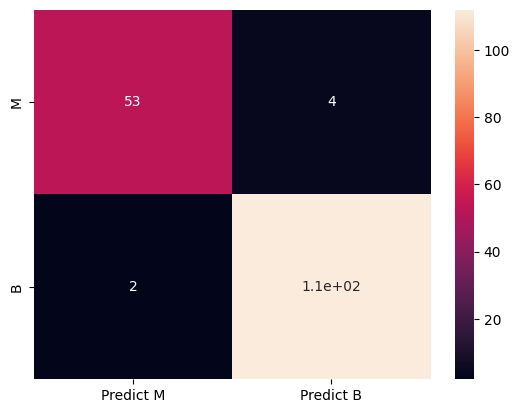

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_predict,labels = ['M','B'])
df_cm= pd.DataFrame(cm,index = [i for i in ['M','B']]
                    ,columns = [i for i in ["Predict M","Predict B"]])
sns.heatmap(df_cm,annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
#selecting the best n_neighbors value for a higher prediction
score1 = []
for i in range (1,100):
  knn_2 = KNeighborsClassifier(n_neighbors = i)
  score2 = cross_val_score(knn_2 ,xScaled_df,y,cv =10)
  score1.append(score2.mean())

In [ ]:
score1


[0.9490914786967419,
 0.9560776942355889,
 0.9666040100250626,
 0.9648809523809525,
 0.9683897243107771,
 0.9631265664160402,
 0.9683897243107771,
 0.9666353383458647,
 0.9701441102756894,
 0.9648809523809524,
 0.9683897243107771,
 0.9683897243107771,
 0.9666040100250626,
 0.9613721804511279,
 0.9648809523809524,
 0.9595864661654134,
 0.9613721804511279,
 0.9613721804511279,
 0.9596177944862155,
 0.9596177944862155,
 0.9578634085213034,
 0.9561090225563911,
 0.9596177944862155,
 0.956077694235589,
 0.956077694235589,
 0.9543233082706767,
 0.9578634085213034,
 0.9543233082706767,
 0.9560776942355889,
 0.9560776942355889,
 0.9560776942355889,
 0.9543233082706767,
 0.9560776942355889,
 0.9543233082706767,
 0.956077694235589,
 0.9578320802005011,
 0.956077694235589,
 0.9543233082706767,
 0.956077694235589,
 0.956077694235589,
 0.956077694235589,
 0.956077694235589,
 0.956077694235589,
 0.9543233082706767,
 0.956077694235589,
 0.9525689223057643,
 0.9543233082706767,
 0.9543233082706767,
 0

In [ ]:
model1 = KNeighborsClassifier(n_neighbors =10,weights = 'distance')


In [ ]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [ ]:
model_predict = model1.predict(x_test)

In [ ]:
model1.score(x_test,y_test)

0.9707602339181286

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

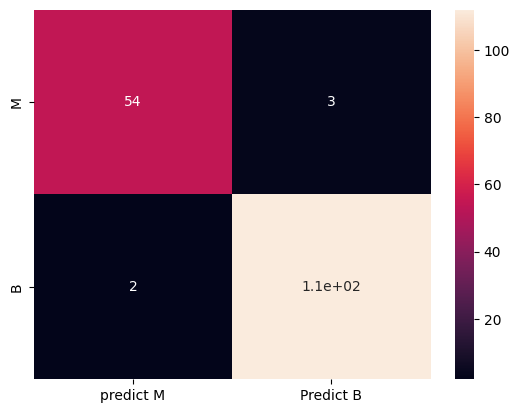

In [ ]:
cm = metrics.confusion_matrix(y_test,model_predict,labels = ['M','B'])
df_cm = pd.DataFrame(cm, index = [i for i in ['M','B']],
                     columns = [i for i in ["predict M","Predict B"]])
sns.heatmap(df_cm,annot = True)
plt.show()